# Ookla Connectivity Data Extractor
**Interactive workflow for downloading and preparing Ookla connectivity data**

This notebook provides an interactive interface for:
1. ✅ Verifying source code modules
2. 🌍 Downloading geographic boundary data (one-time setup)
3. 🗺️ Selecting your region of interest
4. 📥 Downloading Ookla connectivity data
5. 📊 Preparing data for Tableau visualization

---

## Quick Start Guide

1. **Run all cells in order** - Each section builds on the previous
2. **Download Natural Earth data** - One-time setup (Step 1.5)
3. **Select your region** - Works for ANY region worldwide
4. **Customize the configuration** - Select your year, quarter, and data type
5. **Download Ookla data** - Fetch connectivity data from AWS S3
6. **Prepare for Tableau** - Generate optimized Excel files

---

## 📦 Step 1: Environment Setup

Verify that all required modules are available and up-to-date.

In [1]:
import sys
from pathlib import Path
import importlib

# Add project root to path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

# Import all required modules
print("Importing modules...")
print("="*70)

try:
    import pandas as pd
    print("✅ pandas")
except ImportError:
    print("❌ pandas - Run: pip install pandas")

try:
    import geopandas as gpd
    print("✅ geopandas")
except ImportError:
    print("❌ geopandas - Run: pip install geopandas")

try:
    import matplotlib.pyplot as plt
    print("✅ matplotlib")
except ImportError:
    print("❌ matplotlib - Run: pip install matplotlib")

# Import and reload modules to get latest changes
try:
    import src.config as config_module
    importlib.reload(config_module)
    from src.config import list_available_regions, OOKLA_DIR, OUTPUT_DIR
    print("✅ src.config (reloaded)")
except ImportError as e:
    print(f"❌ src.config - {e}")

try:
    import src.data_loader as data_loader_module
    importlib.reload(data_loader_module)
    from src.data_loader import NaturalEarthLoader
    print("✅ src.data_loader (reloaded)")
except ImportError as e:
    print(f"❌ src.data_loader - {e}")

try:
    import src.download_ookla as download_ookla_module
    importlib.reload(download_ookla_module)
    from src.download_ookla import OoklaDownloader
    print("✅ src.download_ookla (reloaded)")
except ImportError as e:
    print(f"❌ src.download_ookla - {e}")

try:
    import src.prepare_tableau as prepare_tableau_module
    importlib.reload(prepare_tableau_module)
    from src.prepare_tableau import TableauDataPreparer
    print("✅ src.prepare_tableau (reloaded)")
except ImportError as e:
    print(f"❌ src.prepare_tableau - {e}")

print("="*70)
print("\n✅ All modules loaded successfully!")
print(f"📁 Project root: {project_root}")
print(f"📁 Data directory: {OOKLA_DIR}")
print(f"📁 Output directory: {OUTPUT_DIR}")
print("\n💡 Tip: All modules are reloaded to reflect latest changes in source files")

Importing modules...
✅ pandas
✅ geopandas
✅ matplotlib
✅ src.config (reloaded)
✅ src.data_loader (reloaded)
✅ src.download_ookla (reloaded)
✅ src.prepare_tableau (reloaded)

✅ All modules loaded successfully!
📁 Project root: /Users/enochtham/Library/CloudStorage/OneDrive-UniversityofOklahoma/VSC - OU/Ookla_final
📁 Data directory: /Users/enochtham/Library/CloudStorage/OneDrive-UniversityofOklahoma/VSC - OU/Ookla_final/data/raw/ookla
📁 Output directory: /Users/enochtham/Library/CloudStorage/OneDrive-UniversityofOklahoma/VSC - OU/Ookla_final/data/output

💡 Tip: All modules are reloaded to reflect latest changes in source files


## 🌍 Step 1.5: Download Natural Earth Data (One-Time Setup)

Natural Earth provides geographic boundaries (countries, provinces) for all regions worldwide.

**This is a one-time download (~150 MB) that works for ALL regions.**

Run the cell below if this is your first time using the system, or if you see errors about missing boundary data.

In [2]:
# Import the download function
try:
    import src.download_natural_earth as download_ne_module
    importlib.reload(download_ne_module)
    from src.download_natural_earth import download_natural_earth
    print("✅ Natural Earth downloader loaded")
except ImportError as e:
    print(f"❌ Failed to load Natural Earth downloader: {e}")
    
# Check if data exists, download if needed
print("\n" + "="*70)
print("Checking Natural Earth Data Status...")
print("="*70)

success = download_natural_earth()

if success:
    print("\n✅ Natural Earth data is ready!")
    print("   You can now proceed to Step 2 to select your region.")
else:
    print("\n❌ Failed to download Natural Earth data.")
    print("   Please check your internet connection and try again.")
    print("   Or download manually from: https://www.naturalearthdata.com/")

✅ Natural Earth downloader loaded

Checking Natural Earth Data Status...
Natural Earth Vector Data Download

✅ Natural Earth data already exists at:
   /Users/enochtham/Library/CloudStorage/OneDrive-UniversityofOklahoma/VSC - OU/Ookla_final/data/raw/natural_earth

   Found 282 shapefiles

   This data is used for all regions worldwide.
   No need to re-download unless data is corrupted.

✅ Natural Earth data is ready!
   You can now proceed to Step 2 to select your region.


## 🌍 Step 2: Select Region

Choose your study region from predefined presets or define a custom region.

In [3]:
# View available regions
list_available_regions()

Available Regions:
  • indonesia_sumatra         - Sumatra Region (Indonesia)
    Provinces: 10
  • indonesia_java            - Java Region (Indonesia)
    Provinces: 6
  • indonesia_kalimantan      - Kalimantan Region (Indonesia)
    Provinces: 5
  • indonesia_sulawesi        - Sulawesi Region (Indonesia)
    Provinces: 6
  • indonesia_bali_nusa_tenggara - Bali and Nusa Tenggara Region (Indonesia)
    Provinces: 3
  • indonesia_maluku          - Maluku Region (Indonesia)
    Provinces: 2
  • indonesia_papua           - Papua Region (Indonesia)
    Provinces: 2


✅ Selected region: indonesia_maluku
Loading geographic boundaries...
📁 NaturalEarthLoader initialized
   Data directory: /Users/enochtham/Library/CloudStorage/OneDrive-UniversityofOklahoma/VSC - OU/Ookla_final/data/raw/natural_earth
   Directory exists: True

🌍 Loading geographic boundaries...

🌍 Setting country context: Indonesia
✅ Loading countries from: ne_10m_admin_0_countries.shp
✅ Country loaded: Indonesia
✅ Loading provinces from: ne_10m_admin_1_states_provinces.shp
✅ Loaded 33 provinces
✅ Found 2/2 province(s) in Indonesia
✅ Region configured: Maluku Region
   Country: Indonesia
   Provinces: 2

✅ Region configured and boundaries loaded!


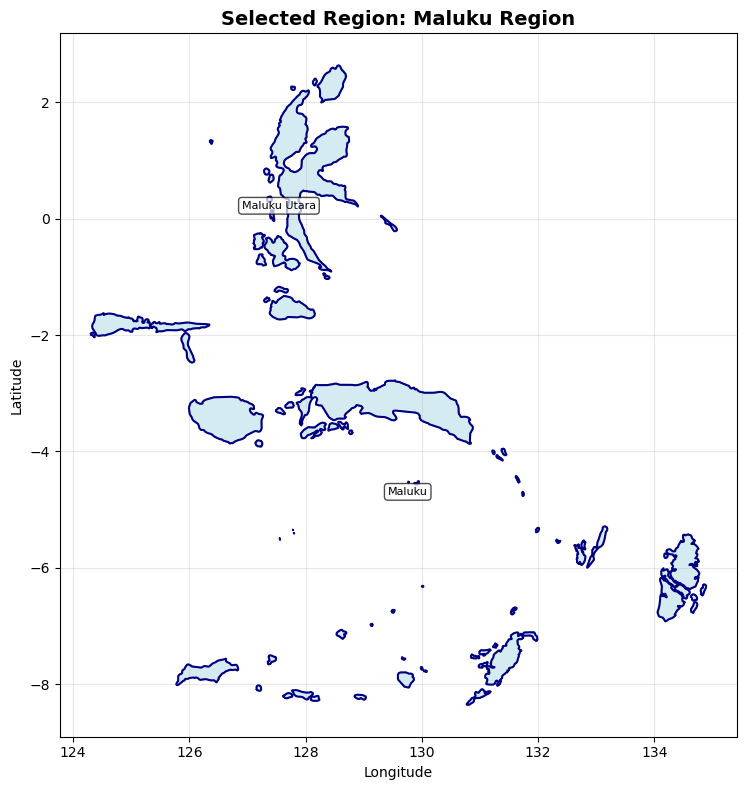

✅ Visualized 2 provinces


In [4]:
# ============================================================================
# CONFIGURATION: Select your region
# ============================================================================

# Option 1: Use a preset region
SELECTED_REGION = 'indonesia_maluku'  # Change this to your desired region

# Option 2: Define custom region (uncomment to use)
# CUSTOM_COUNTRY = 'Indonesia'
# CUSTOM_PROVINCES = ['Aceh', 'Bali', 'DKI Jakarta']

print(f"✅ Selected region: {SELECTED_REGION}")



# Load geographic boundaries for selected region
print("Loading geographic boundaries...")

downloader = OoklaDownloader()
downloader.set_region(SELECTED_REGION)

print("\n✅ Region configured and boundaries loaded!")

# Visualize the selected region
fig, ax = plt.subplots(figsize=(12, 8))
downloader.boundaries.plot(ax=ax, edgecolor='blue', facecolor='lightblue', alpha=0.5)
downloader.boundaries.boundary.plot(ax=ax, edgecolor='navy', linewidth=1.5)

# Add province labels
for idx, row in downloader.boundaries.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, row['name'], 
            fontsize=8, ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

ax.set_title(f"Selected Region: {downloader.region_info['name']}", fontsize=14, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"✅ Visualized {len(downloader.boundaries)} provinces")

## 🗺️ Step 2.5: Export Complete Country Structure for Tableau

Generate a comprehensive Excel file showing the entire country with all provinces organized by island groups (regions).
Perfect for hierarchical drill-down visualizations in Tableau.

In [7]:
# Load all provinces for Indonesia
from src.data_loader import NaturalEarthLoader
loader = NaturalEarthLoader()
loader.set_country(downloader.region_info['country'])
all_provinces_gdf = loader.get_provinces()

# Island group mappings
ISLAND_GROUPS = {
    'Sumatra': ['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
                'Sumatera Selatan', 'Bengkulu', 'Lampung', 'Bangka-Belitung', 
                'Kepulauan Bangka Belitung', 'Kepulauan Riau'],
    'Java': ['Banten', 'Jakarta Raya', 'DKI Jakarta', 'Jawa Barat', 
             'Jawa Tengah', 'Yogyakarta', 'DI Yogyakarta', 'Jawa Timur'],
    'Kalimantan': ['Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Selatan',
                   'Kalimantan Timur', 'Kalimantan Utara'],
    'Sulawesi': ['Sulawesi Utara', 'Sulawesi Tengah', 'Sulawesi Selatan',
                 'Sulawesi Tenggara', 'Gorontalo', 'Sulawesi Barat'],
    'Maluku': ['Maluku', 'Maluku Utara'],
    'Nusa Tenggara': ['Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur'],
    'Papua': ['Papua', 'Papua Barat', 'Papua Tengah', 'Papua Pegunungan',
              'Papua Selatan', 'Papua Barat Daya']
}

# Assign island groups
def get_island_group(province_name):
    prov_lower = province_name.lower().strip()
    for group, provinces in ISLAND_GROUPS.items():
        for p in provinces:
            if prov_lower in p.lower() or p.lower() in prov_lower:
                return group
    return 'Other'

all_provinces_gdf['island_group'] = all_provinces_gdf['name'].apply(get_island_group)

# Add centroid lat/lon for linking with cyclone data
all_provinces_gdf['lat'] = all_provinces_gdf.geometry.centroid.y
all_provinces_gdf['lon'] = all_provinces_gdf.geometry.centroid.x

# Export Shapefile for Tableau
shapefile_dir = OUTPUT_DIR / "shapefiles"
shapefile_dir.mkdir(exist_ok=True)

shp_export = all_provinces_gdf[['name', 'island_group', 'lat', 'lon', 'geometry']].copy()
shp_export.columns = ['province', 'isl_group', 'lat', 'lon', 'geometry']

country_name = downloader.region_info['country'].replace(' ', '_').lower()
shapefile_path = shapefile_dir / f"{country_name}_provinces.shp"
shp_export.to_file(shapefile_path, driver='ESRI Shapefile')

print(f"✅ Exported {len(shp_export)} provinces to: {shapefile_path}")
print(f"   Columns: province, isl_group, lat, lon, geometry")
print(f"\n🎯 Tableau: Join with cyclone data using lat/lon proximity!")

📁 NaturalEarthLoader initialized
   Data directory: /Users/enochtham/Library/CloudStorage/OneDrive-UniversityofOklahoma/VSC - OU/Ookla_final/data/raw/natural_earth
   Directory exists: True

🌍 Setting country context: Indonesia
✅ Loading countries from: ne_10m_admin_0_countries.shp
✅ Country loaded: Indonesia
✅ Loading provinces from: ne_10m_admin_1_states_provinces.shp


/var/folders/tb/14b730156ps6164qp5516v5h0000gn/T/ipykernel_43203/110538120.py:36: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  all_provinces_gdf['lat'] = all_provinces_gdf.geometry.centroid.y
/var/folders/tb/14b730156ps6164qp5516v5h0000gn/T/ipykernel_43203/110538120.py:37: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  all_provinces_gdf['lon'] = all_provinces_gdf.geometry.centroid.x
2025-11-29 16:57:35,265 - INFO - Created 33 records


✅ Loaded 33 provinces
✅ Exported 33 provinces to: /Users/enochtham/Library/CloudStorage/OneDrive-UniversityofOklahoma/VSC - OU/Ookla_final/data/output/shapefiles/indonesia_provinces.shp
   Columns: province, isl_group, lat, lon, geometry

🎯 Tableau: Join with cyclone data using lat/lon proximity!


## 📥 Step 3: Download Ookla Data

Download connectivity data from Ookla's S3 bucket for your selected region.

In [7]:
# ============================================================================
# CONFIGURATION: Select download parameters
# ============================================================================

# Year and Quarter
YEAR = 2019

QUARTERS = [1, 2, 3, 4]  # List of quarters to download [1, 2, 3, 4]

# Data types
DATA_TYPES = ['fixed']  # Options: 'mobile', 'fixed', or both

print(f"✅ Download Configuration:")
print(f"   Year:     {YEAR}")
print(f"   Quarters: {QUARTERS}")
print(f"   Types:    {DATA_TYPES}")

✅ Download Configuration:
   Year:     2019
   Quarters: [1, 2, 3, 4]
   Types:    ['fixed']


In [2]:
# Download data for all specified periods
print("Starting download...")
print("="*70)
print("⏳ This may take several minutes depending on region size and quarters selected")
print("="*70)

downloaded_data = downloader.download_multiple(YEAR, QUARTERS, DATA_TYPES)

print(f"\n{'='*70}")
print(f"✅ DOWNLOAD COMPLETE!")
print(f"{'='*70}")
print(f"Downloaded {len(downloaded_data)} dataset(s):")
for key in downloaded_data.keys():
    print(f"  • {key}")
print(f"{'='*70}")

Starting download...
⏳ This may take several minutes depending on region size and quarters selected


NameError: name 'downloader' is not defined

In [5]:
# List all downloaded files
downloader.list_downloaded_files()

No downloaded files found in:
  /Users/enochtham/Library/CloudStorage/OneDrive-UniversityofOklahoma/VSC - OU/Ookla_final/data/raw/ookla


[]

## 📊 Step 4: Prepare Data for Tableau

Select which files to process and convert them to Excel format.

**Default behavior:** Each geoparquet file is converted to its own Excel file, preserving data separation.

**Options:**
- Process all files or select specific ones
- Keep files separate (recommended) or combine them

In [9]:
# Find all downloaded files to prepare
all_ookla_files = list(OOKLA_DIR.glob('*.geoparquet'))

if not all_ookla_files:
    print("❌ No Ookla data files found!")
    print(f"   Please run Step 3 to download data first.")
else:
    print(f"Found {len(all_ookla_files)} file(s) available:\n")
    for idx, f in enumerate(all_ookla_files, 1):
        size_mb = f.stat().st_size / (1024 * 1024)
        print(f"   [{idx}] {f.name} ({size_mb:.1f} MB)")
    
    print(f"\n{'─'*70}")
    print("💡 TIP: You can select specific files to process in the next cell")
    print(f"{'─'*70}")

Found 50 file(s) available:

   [1] bali_and_nusa_tenggara_region_2025_Q1_fixed_20251130.geoparquet (0.6 MB)
   [2] bali_and_nusa_tenggara_region_2022_Q2_fixed_20251129.geoparquet (0.5 MB)
   [3] bali_and_nusa_tenggara_region_2024_Q4_mobile_20251129.geoparquet (0.5 MB)
   [4] bali_and_nusa_tenggara_region_2023_Q3_fixed_20251129.geoparquet (0.5 MB)
   [5] bali_and_nusa_tenggara_region_2023_Q3_mobile_20251129.geoparquet (0.5 MB)
   [6] bali_and_nusa_tenggara_region_2020_Q4_fixed_20251129.geoparquet (0.2 MB)
   [7] bali_and_nusa_tenggara_region_2020_Q3_fixed_20251129.geoparquet (0.2 MB)
   [8] bali_and_nusa_tenggara_region_2023_Q4_mobile_20251129.geoparquet (0.5 MB)
   [9] bali_and_nusa_tenggara_region_2023_Q4_fixed_20251129.geoparquet (0.6 MB)
   [10] bali_and_nusa_tenggara_region_2022_Q2_mobile_20251129.geoparquet (0.5 MB)
   [11] bali_and_nusa_tenggara_region_2021_Q2_fixed_20251129.geoparquet (0.2 MB)
   [12] bali_and_nusa_tenggara_region_2024_Q3_mobile_20251129.geoparquet (0.5 MB)
   

In [10]:
# ============================================================================
# CONFIGURATION: Select files to process
# ============================================================================

# Option 1: Process ALL files (default)
#ookla_files = all_ookla_files

# Option 2: Select specific files by index (uncomment to use)
# Example: Process files 1 and 3
#selected_indices = [3, 5, 7, 8]  # Change these numbers based on the list above
#ookla_files = [all_ookla_files[i-1] for i in selected_indices]

# Option 3: Select files by pattern (uncomment to use)
# Example: Only mobile files
ookla_files = [f for f in all_ookla_files if 'mobile' in f.name]

# Option 4: Select files by name (uncomment to use)
# Example: Specific file names
# ookla_files = [f for f in all_ookla_files if f.name in [
#     'sumatra_region_2024_Q1_mobile_20251113.geoparquet',
#     'sumatra_region_2024_Q2_mobile_20251113.geoparquet'
# ]]

print(f"✅ Selected {len(ookla_files)} file(s) to process:")
for f in ookla_files:
    print(f"   • {f.name}")

✅ Selected 27 file(s) to process:
   • bali_and_nusa_tenggara_region_2024_Q4_mobile_20251129.geoparquet
   • bali_and_nusa_tenggara_region_2023_Q3_mobile_20251129.geoparquet
   • bali_and_nusa_tenggara_region_2023_Q4_mobile_20251129.geoparquet
   • bali_and_nusa_tenggara_region_2022_Q2_mobile_20251129.geoparquet
   • bali_and_nusa_tenggara_region_2024_Q3_mobile_20251129.geoparquet
   • bali_and_nusa_tenggara_region_2025_Q2_mobile_20251130.geoparquet
   • bali_and_nusa_tenggara_region_2020_Q1_mobile_20251129.geoparquet
   • bali_and_nusa_tenggara_region_2022_Q3_mobile_20251129.geoparquet
   • bali_and_nusa_tenggara_region_2025_Q3_mobile_20251130.geoparquet
   • bali_and_nusa_tenggara_region_2024_Q2_mobile_20251129.geoparquet
   • bali_and_nusa_tenggara_region_2021_Q1_mobile_20251129.geoparquet
   • bali_and_nusa_tenggara_region_2019_Q1_mobile_20251127.geoparquet
   • bali_and_nusa_tenggara_region_2023_Q2_mobile_20251129.geoparquet
   • bali_and_nusa_tenggara_region_2022_Q4_mobile_202511

In [11]:
# ============================================================================
# CONFIGURATION: Processing mode
# ============================================================================

# Option 1: Keep files SEPARATE (default - recommended)
# Each geoparquet file creates its own Excel file
COMBINE_FILES = True

# Option 2: COMBINE all files into one Excel
# All selected files merged into a single Excel file
# COMBINE_FILES = True

print(f"📦 Processing Mode: {'COMBINED' if COMBINE_FILES else 'INDIVIDUAL'}")
print(f"{'─'*70}\n")

# Prepare Tableau-ready Excel files
preparer = TableauDataPreparer()

# Prepare all files
output_files = preparer.prepare_from_files(ookla_files, combine=COMBINE_FILES)

2025-12-02 23:21:57,590 - INFO - TableauDataPreparer initialized
2025-12-02 23:21:57,591 - INFO - Output directory: /Users/enochtham/Library/CloudStorage/OneDrive-UniversityofOklahoma/VSC - OU/Ookla_final/data/output
2025-12-02 23:21:57,593 - INFO - Loading: bali_and_nusa_tenggara_region_2024_Q4_mobile_20251129.geoparquet
2025-12-02 23:21:57,695 - INFO - Loading: bali_and_nusa_tenggara_region_2023_Q3_mobile_20251129.geoparquet
2025-12-02 23:21:57,700 - INFO - Loading: bali_and_nusa_tenggara_region_2023_Q4_mobile_20251129.geoparquet
2025-12-02 23:21:57,705 - INFO - Loading: bali_and_nusa_tenggara_region_2022_Q2_mobile_20251129.geoparquet
2025-12-02 23:21:57,711 - INFO - Loading: bali_and_nusa_tenggara_region_2024_Q3_mobile_20251129.geoparquet
2025-12-02 23:21:57,716 - INFO - Loading: bali_and_nusa_tenggara_region_2025_Q2_mobile_20251130.geoparquet
2025-12-02 23:21:57,720 - INFO - Loading: bali_and_nusa_tenggara_region_2020_Q1_mobile_20251129.geoparquet
2025-12-02 23:21:57,725 - INFO - L

📦 Processing Mode: COMBINED
──────────────────────────────────────────────────────────────────────


PREPARING OOKLA DATA FOR TABLEAU

📦 Mode: COMBINE - All files merged into one Excel


2025-12-02 23:21:57,796 - INFO - Loading: bali_and_nusa_tenggara_region_2020_Q4_mobile_20251129.geoparquet
2025-12-02 23:21:57,800 - INFO - Loading: bali_and_nusa_tenggara_region_2019_Q2_mobile_20251127.geoparquet
2025-12-02 23:21:57,806 - INFO - Loading: bali_and_nusa_tenggara_region_2023_Q1_mobile_20251129.geoparquet
2025-12-02 23:21:57,811 - INFO - Loading: bali_and_nusa_tenggara_region_2020_Q3_mobile_20251129.geoparquet
2025-12-02 23:21:57,816 - INFO - Loading: bali_and_nusa_tenggara_region_2024_Q1_mobile_20251129.geoparquet
2025-12-02 23:21:57,831 - INFO - ✅ Combined 205,237 total records



📦 Aggregating data to bins...
   🗺️  Decoding quadkeys to lat/lon coordinates...


2025-12-02 23:21:58,960 - INFO - ✅ Aggregated to 205,237 bins
2025-12-02 23:21:58,960 - INFO -    Compression: 205,237 → 205,237 (100.0%)


   ✅ Added lat/lon columns for Tableau mapping

💾 Exporting to Excel format...


2025-12-02 23:22:22,467 - INFO -    Sheet 'All Data': 205,237 rows
2025-12-02 23:22:56,081 - INFO -    Sheet 'Mobile': 205,237 rows



⏰ Creating time period comparison...


2025-12-02 23:23:37,744 - INFO -    Sheet 'Comparison': 205,237 rows
2025-12-02 23:23:51,404 - INFO - ✅ Created comparison file with baseline: 2019 Q1



✅ Created 3 Excel file(s):
   • combined       : bali_and_nusa_tenggara_region_tableau_20251202_combined.xlsx (18.6 MB)
   • mobile         : bali_and_nusa_tenggara_region_tableau_20251202_mobile.xlsx (18.6 MB)
   • comparison     : bali_and_nusa_tenggara_region_tableau_20251202_comparison.xlsx (30.9 MB)

SUMMARY STATISTICS

📊 Data Overview:
   Raw records:        205,237
   Aggregated bins:    205,237
   Compression ratio:  100.0%
   Region:             Bali and Nusa Tenggara Region

📅 Time Periods:
   • 2019 Q1: 7,085 records
   • 2019 Q2: 7,959 records
   • 2019 Q3: 7,163 records
   • 2019 Q4: 6,650 records
   • 2020 Q1: 6,164 records
   • 2020 Q2: 6,367 records
   • 2020 Q3: 6,982 records
   • 2020 Q4: 7,482 records
   • 2021 Q1: 7,518 records
   • 2021 Q2: 7,763 records
   • 2021 Q3: 8,039 records
   • 2021 Q4: 8,440 records
   • 2022 Q1: 7,674 records
   • 2022 Q2: 8,479 records
   • 2022 Q3: 8,226 records
   • 2022 Q4: 7,463 records
   • 2023 Q1: 7,256 records
   • 2023 Q2: 8,2

## 📈 Optional: Preview Data

Quick preview of the downloaded connectivity data.

In [ ]:
# Load and preview one of the downloaded datasets
if ookla_files:
    sample_file = ookla_files[0]
    print(f"Loading sample data: {sample_file.name}")
    
    sample_data = pd.read_parquet(sample_file)
    
    print(f"\n📊 Dataset Preview:")
    print(f"   Total records: {len(sample_data):,}")
    print(f"   Columns: {len(sample_data.columns)}")
    print(f"\n   First 5 rows:")
    display(sample_data.head())
    
    print(f"\n📈 Basic Statistics:")
    if 'avg_d_mbps' in sample_data.columns:
        print(f"   Download Speed (Mbps):")
        print(f"      Mean:   {sample_data['avg_d_mbps'].mean():.2f}")
        print(f"      Median: {sample_data['avg_d_mbps'].median():.2f}")
        print(f"      Min:    {sample_data['avg_d_mbps'].min():.2f}")
        print(f"      Max:    {sample_data['avg_d_mbps'].max():.2f}")
    
    if 'avg_u_mbps' in sample_data.columns:
        print(f"   Upload Speed (Mbps):")
        print(f"      Mean:   {sample_data['avg_u_mbps'].mean():.2f}")
        print(f"      Median: {sample_data['avg_u_mbps'].median():.2f}")
        print(f"      Min:    {sample_data['avg_u_mbps'].min():.2f}")
        print(f"      Max:    {sample_data['avg_u_mbps'].max():.2f}")
else:
    print("No data files available for preview.")

Loading sample data: maluku_region_2019_Q3_mobile_20251125.geoparquet

📊 Dataset Preview:
   Total records: 705
   Columns: 15

   First 5 rows:


,tests,quadkey,name,devices,avg_d_kbps,avg_u_kbps,tile,avg_lat_ms,year,quarter,data_type,region,country,avg_d_mbps,avg_u_mbps
0,10,1323323031231131,Maluku Utara,1,23483,8039,"POLYGON((127.787475585938 1.83440332449352, 12...",69,2019,3,mobile,Maluku Region,Indonesia,23.483,8.039
1,13,1323323031231133,Maluku Utara,3,31818,15067,"POLYGON((127.787475585938 1.82891296715362, 12...",70,2019,3,mobile,Maluku Region,Indonesia,31.818,15.067
2,5,1323323031320020,Maluku Utara,1,67753,23222,"POLYGON((127.79296875 1.83440332449352, 127.79...",83,2019,3,mobile,Maluku Region,Indonesia,67.753,23.222
3,1,1323323031320021,Maluku Utara,1,42603,15655,"POLYGON((127.798461914062 1.83440332449352, 12...",59,2019,3,mobile,Maluku Region,Indonesia,42.603,15.655
4,2,1323323031320022,Maluku Utara,2,11907,4778,"POLYGON((127.79296875 1.82891296715362, 127.79...",107,2019,3,mobile,Maluku Region,Indonesia,11.907,4.778



📈 Basic Statistics:
   Download Speed (Mbps):
      Mean:   14.59
      Median: 12.14
      Min:    0.01
      Max:    81.02
   Upload Speed (Mbps):
      Mean:   10.51
      Median: 9.66
      Min:    0.00
      Max:    38.56


---

## 🎯 Summary

This notebook provides a complete workflow for:
- ✅ Downloading Natural Earth geographic boundaries (one-time, all regions)
- ✅ Loading boundaries for your selected region
- ✅ Downloading Ookla connectivity data from S3
- ✅ Filtering data to your specified region
- ✅ Preparing Excel files for Tableau (each file kept separate)

### Quick Reference

**First time setup:**
1. Run Step 1.5 to download Natural Earth data (one-time, ~150 MB)
2. This data works for ALL regions worldwide - no region-specific downloads needed

**To analyze a different region:**
1. Change `SELECTED_REGION` in Step 2
2. Re-run cells from Step 2 onwards
3. No need to re-download Natural Earth data

**To download different time periods:**
1. Modify `YEAR` and `QUARTERS` in Step 3
2. Re-run Step 3 and Step 4

**To process specific files:**
1. In Step 4, uncomment and modify one of the file selection options
2. Choose between separate or combined Excel output

**To add new regions:**
1. Edit `src/config.py`
2. Add entry to `REGION_PRESETS` dictionary
3. Re-run first cell to reload config
4. Or simply specify custom country/provinces in the notebook

### Output Files

- **Natural Earth Data**: `data/raw/natural_earth/` (one-time download, all regions)
- **Raw Ookla Data**: `data/raw/ookla/*.geoparquet` (one per quarter/type)
- **Tableau Files**: `data/output/*.xlsx` (one per geoparquet by default)

### File Processing Modes

**Individual (Default):** Each geoparquet → separate Excel
- ✅ Preserves data separation
- ✅ Easier to manage in Tableau
- ✅ Better performance

**Combined:** All geoparquet → single Excel
- Use when comparing across all periods
- Larger file size

### Geographic Data

Natural Earth provides boundary data for:
- 🌍 All countries worldwide
- 🗺️ Provinces/states for most countries
- 🏝️ Multiple detail levels (10m, 50m, 110m)

This single download supports analysis of ANY geographic region!

---

**Need help?** Check the README.md in the project root.